# **DND Assignment 2. -- Object Detection with YOLOV7**

**Author:   Csaba Ömböli** <br>
**Neptun:   SC3YBP** <br>
**Task:     Object detection** <br>
**Target Object:    freshwater fishes** <br>

The goal is to identify freshwater fishes wich are native in Hungary.<br>

## Dataset

The images were manually collected by me at first from Google images by searching for different fish species. Such as: *carp, grasscarp, perch, zander, pike, catfish* and more. These species are really different looking, so the dataset wasn't good enough to achive a high accuracy. One other problem was, that fishes on these images are taken out of the water, held in the fishermans' hands. This is not the natural environment of this animal, so when the model, trained on these images, comes to detect fishes in a natural position i.e. underwater photos, it will give a bad result.
After recognizing the above mentioned things, I gathered underwater images of fishes from [this 24/7 stream](https://www.idokep.hu/webkamera/izsoldistvan). These show fishes in their natural environment, but they are also much more noisy, blury, shady, and the resolution of the appearing fishes are much weaker as well.
<br>
There is in total 559 images, including the ones generated after the pre-processing and augmenting. (80% - train, 20% - validation)

## Data pre-processing and augmentation

The images were annotated with the online [Roboflow app.](https://app.roboflow.com/)<br>
The following steps were applied:
### PREPROCESSING
 Auto-Orient: Applied
- Resize: Fit (black edges) in 640x640
- Auto-Adjust Contrast: Using Histogram Equalization

### AUGMENTATIONS
- Outputs per training example: 3
- Rotation: Between -45° and +45°
- Saturation: Between -70% and +70%



In [8]:
import torch
from IPython.display import Image, clear_output  # to display images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu116 on device (NVIDIA GeForce GTX 1050 Ti)


In [4]:
#list the training images

path = 'fish/train/images/'
res=[]
for file in os.listdir(path):
    # check only text files
    if file.endswith('.jpg'):
        res.append('./images/'+file)
#print(res[1])
with open('fish/train/train.txt', 'w') as f:
    for line in res:
        f.write(line)
        f.write('\n')
f.close()


#list the validation images

path = 'fish/valid/images/'
res=[]
for file in os.listdir(path):
    # check only text files
    if file.endswith('.jpg'):
        res.append('./images/'+file)
#print(res[1])
with open('fish/valid/valid.txt', 'w') as f:
    for line in res:
        f.write(line)
        f.write('\n')
f.close()



## Training the model
The model was trained with the following arguments:
(Low execution time is displayed because it was called from console. It ran for about 8 hours long.)

In [6]:
!python train.py --workers 2 --batch-size 32 --device 0 --epochs 250 --data data/fish.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights 'yolov7_training.pt' --name fish --hyp data/hyp.scratch.p5.yaml

### The following hyperparameters were used in the final version:

- lr0: 0.001  # initial learning rate (SGD=1E-2, Adam=1E-3)
- lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)
- momentum: 0.937  # SGD momentum/Adam beta1
- weight_decay: 0.0005  # optimizer weight decay 5e-4
- warmup_epochs: 3.0  # warmup epochs (fractions ok)
- warmup_momentum: 0.8  # warmup initial momentum
- warmup_bias_lr: 0.1  # warmup initial bias lr
- box: 0.05  # box loss gain
- cls: 0.3  # cls loss gain
- cls_pw: 1.0  # cls BCELoss positive_weight
- obj: 0.7  # obj loss gain (scale with pixels)
- obj_pw: 1.0  # obj BCELoss positive_weight
- iou_t: 0.20  # IoU training threshold
- anchor_t: 4.0  # anchor-multiple threshold
- fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
- hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
- hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
- hsv_v: 0.4  # image HSV-Value augmentation (fraction)
- degrees: 0.0  # image rotation (+/- deg)
- translate: 0.2  # image translation (+/- fraction)
- scale: 0.9  # image scale (+/- gain)
- shear: 0.0  # image shear (+/- deg)
- perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
- flipud: 0.0  # image flip up-down (probability)
- fliplr: 0.5  # image flip left-right (probability)
- mosaic: 1.0  # image mosaic (probability)
- mixup: 0.15  # image mixup (probability)
- copy_paste: 0.0  # image copy paste (probability)
- paste_in: 0.0  # image copy paste (probability), use 0 for faster training
- loss_ota: 0.0 # use ComputeLossOTA, use 0 for faster training

## Results

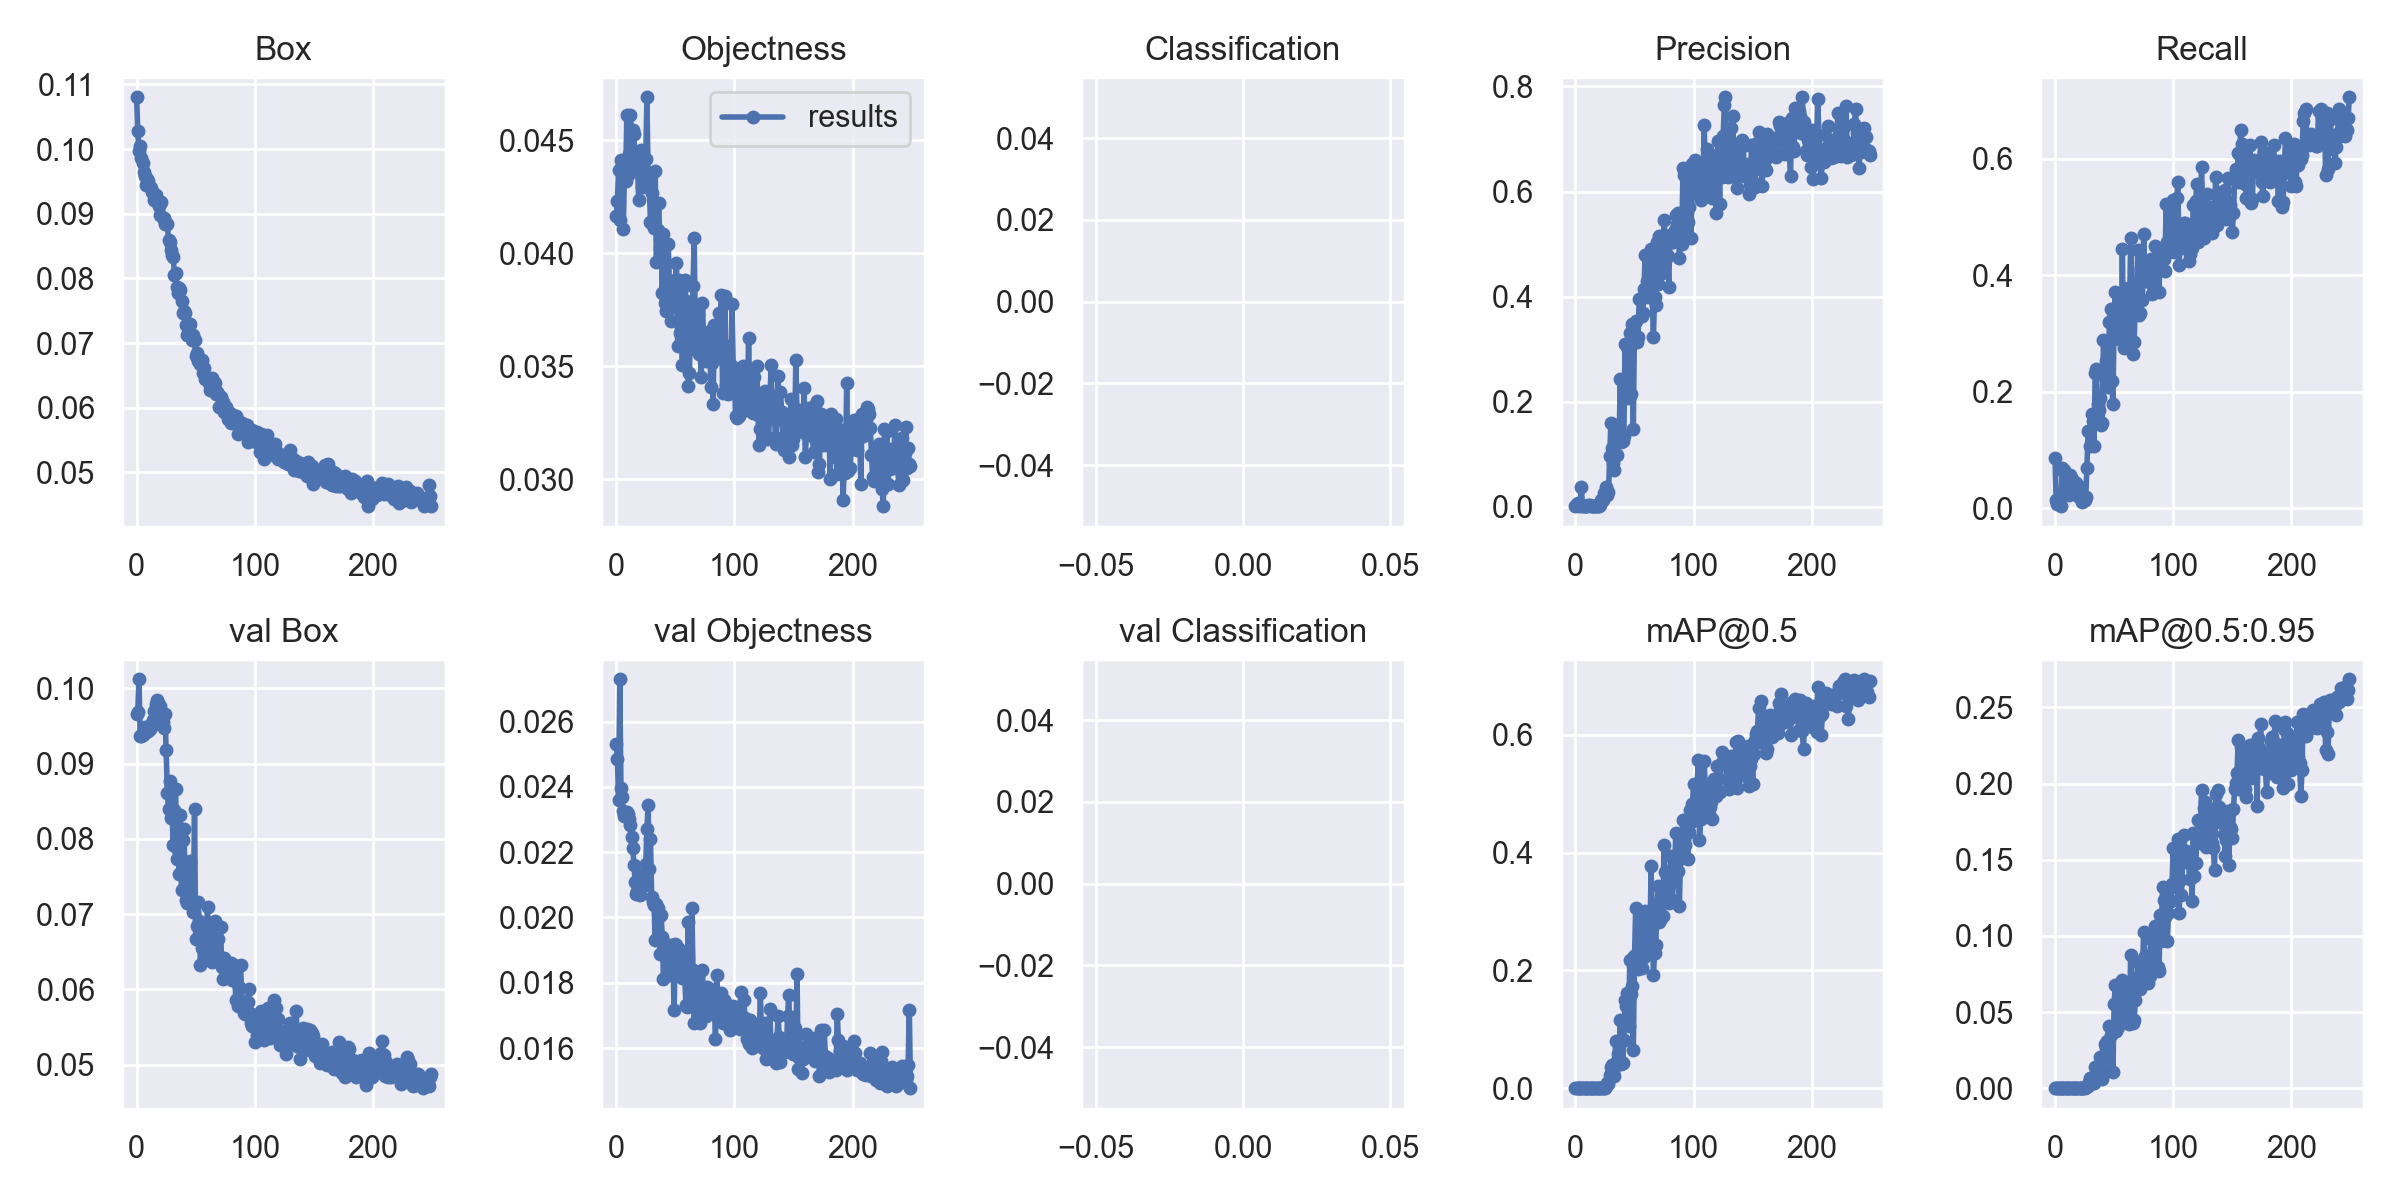

In [3]:
Image(filename='runs/train/fish26/results.png', width=800)
# Image(filename='runs/train/fish7/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

Thes above graphs can be misleading. First of all by the numbers it seems that the result is not as good, because the mAP values arent really high. Second of all I think it is pretty good, especially if we consider that how diverse the images are. It is clear, that the loss is decreasing through the epochs, and the accuracy is growing. A way for the better results could be to increase the number of epochs, which unfortunetly wasn't possible, because of the time-shortage.

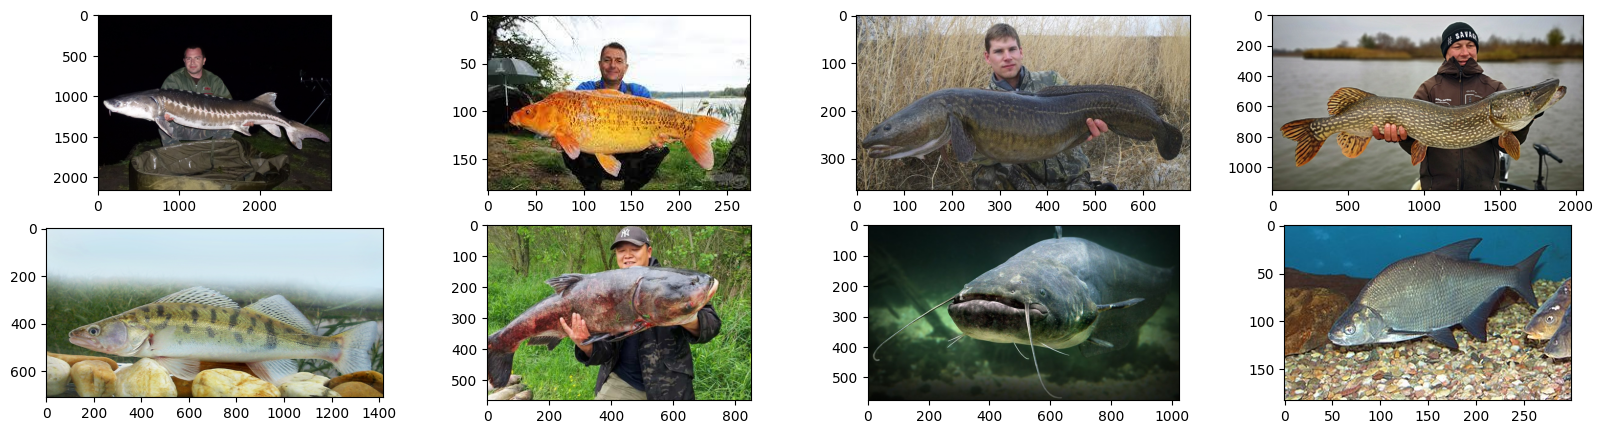

In [26]:
img1 = mpimg.imread('examples/fish (1).jpg')
img2 = mpimg.imread('examples/fish (6).jpg')
img3 = mpimg.imread('examples/fish (7).jpg')
img4 = mpimg.imread('examples/fish (8).jpg')
img5 = mpimg.imread('examples/fish (9).jpg')
img6 = mpimg.imread('examples/fish (10).jpg')
img7 = mpimg.imread('examples/fish (11).jpg')
img8 = mpimg.imread('examples/fish (86).jpg')

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20, 5)
ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[0][2].imshow(img3)
ax[0][3].imshow(img4)
ax[1][0].imshow(img5)
ax[1][1].imshow(img6)
ax[1][2].imshow(img7)
ax[1][3].imshow(img8)

As it's visible above, different fish species has significantly different shape, size, and color. It's not easy to generalize enough, but not too much.


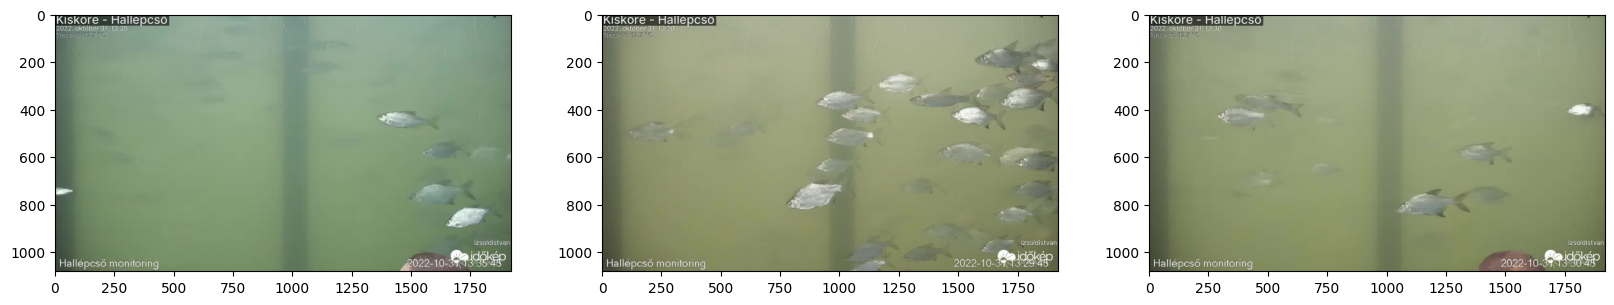

In [31]:
img9 = mpimg.imread('examples/fish (2).jpg')
img10 = mpimg.imread('examples/fish (3).jpg')
img11 = mpimg.imread('examples/fish (5).jpg')

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)
ax[0].imshow(img9)
ax[1].imshow(img10)
ax[2].imshow(img11)

Such images give a realistic picture of a fish underwater, but are very different from what you have seen before.

### The training batches

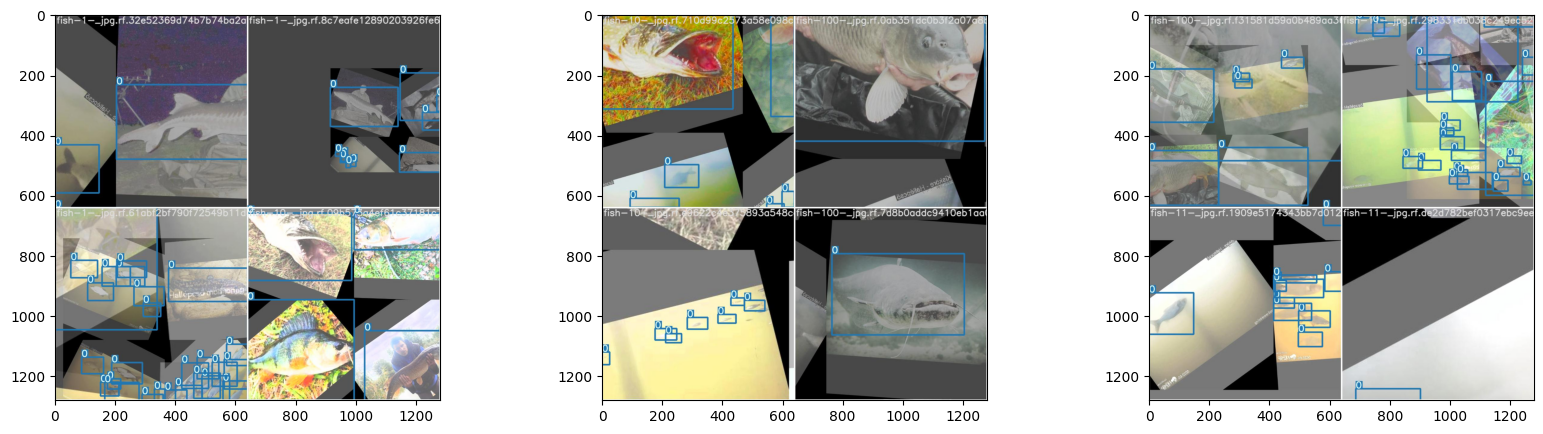

In [32]:
img12 = mpimg.imread('runs/train/fish26/train_batch0.jpg')
img13 = mpimg.imread('runs/train/fish26/train_batch1.jpg')
img14 = mpimg.imread('runs/train/fish26/train_batch2.jpg')

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)
ax[0].imshow(img12)
ax[1].imshow(img13)
ax[2].imshow(img14)

### And some predictions

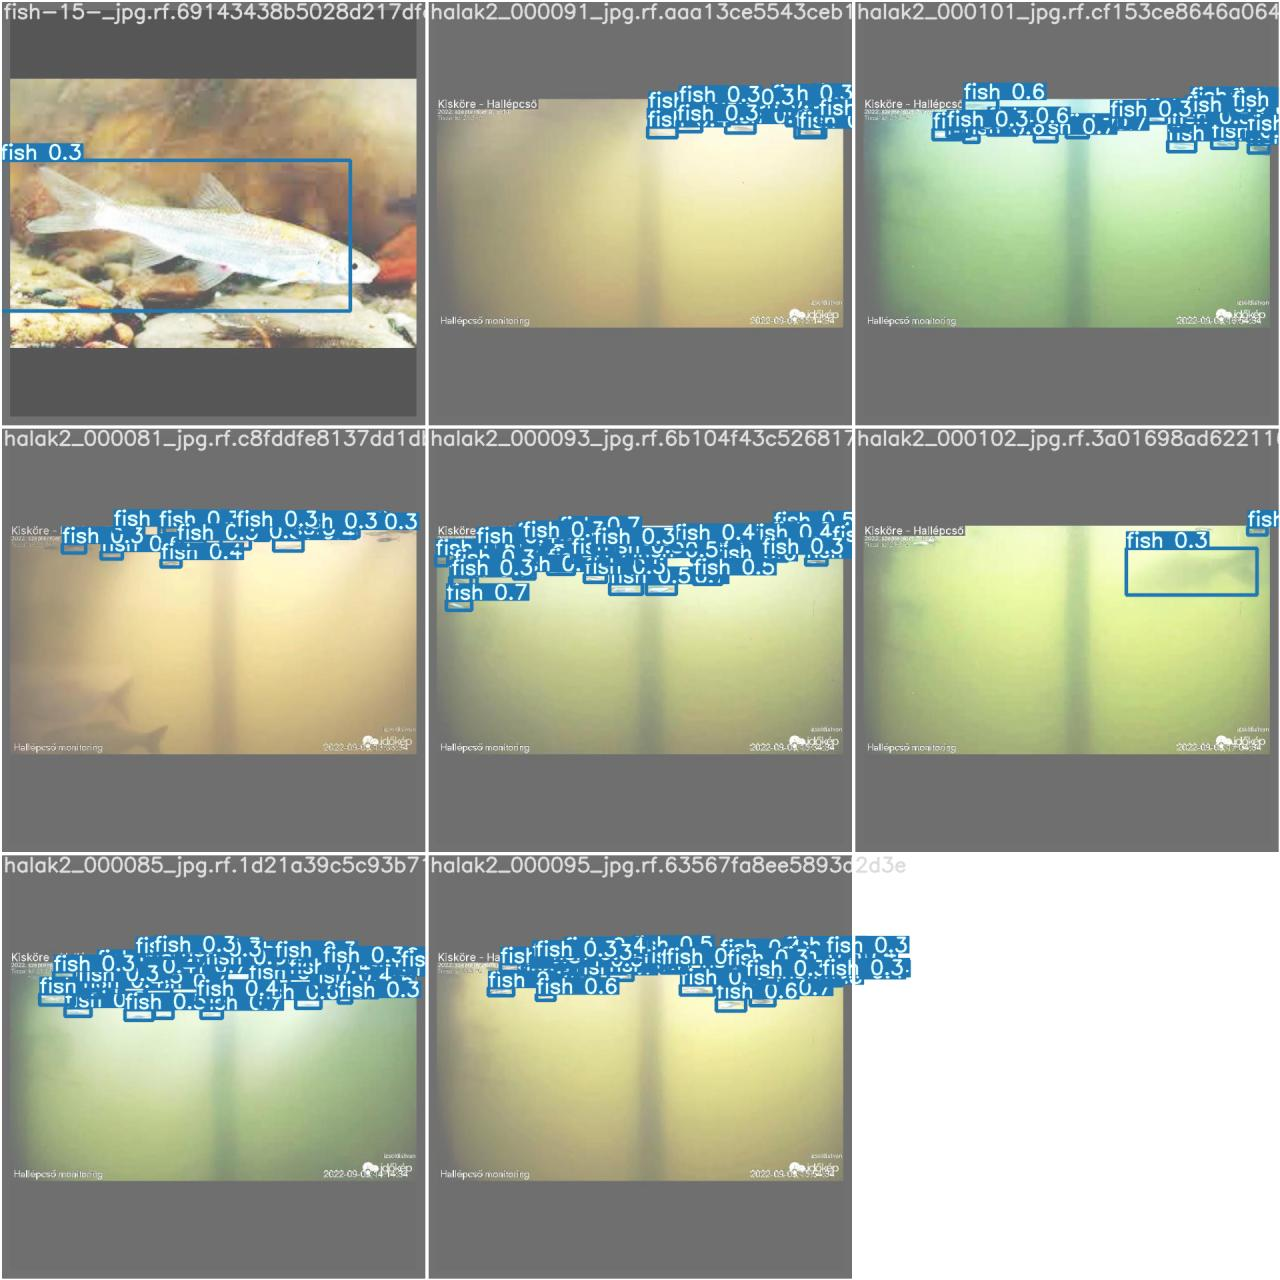

In [40]:
Image('runs/train/fish26/test_batch0_pred.jpg')

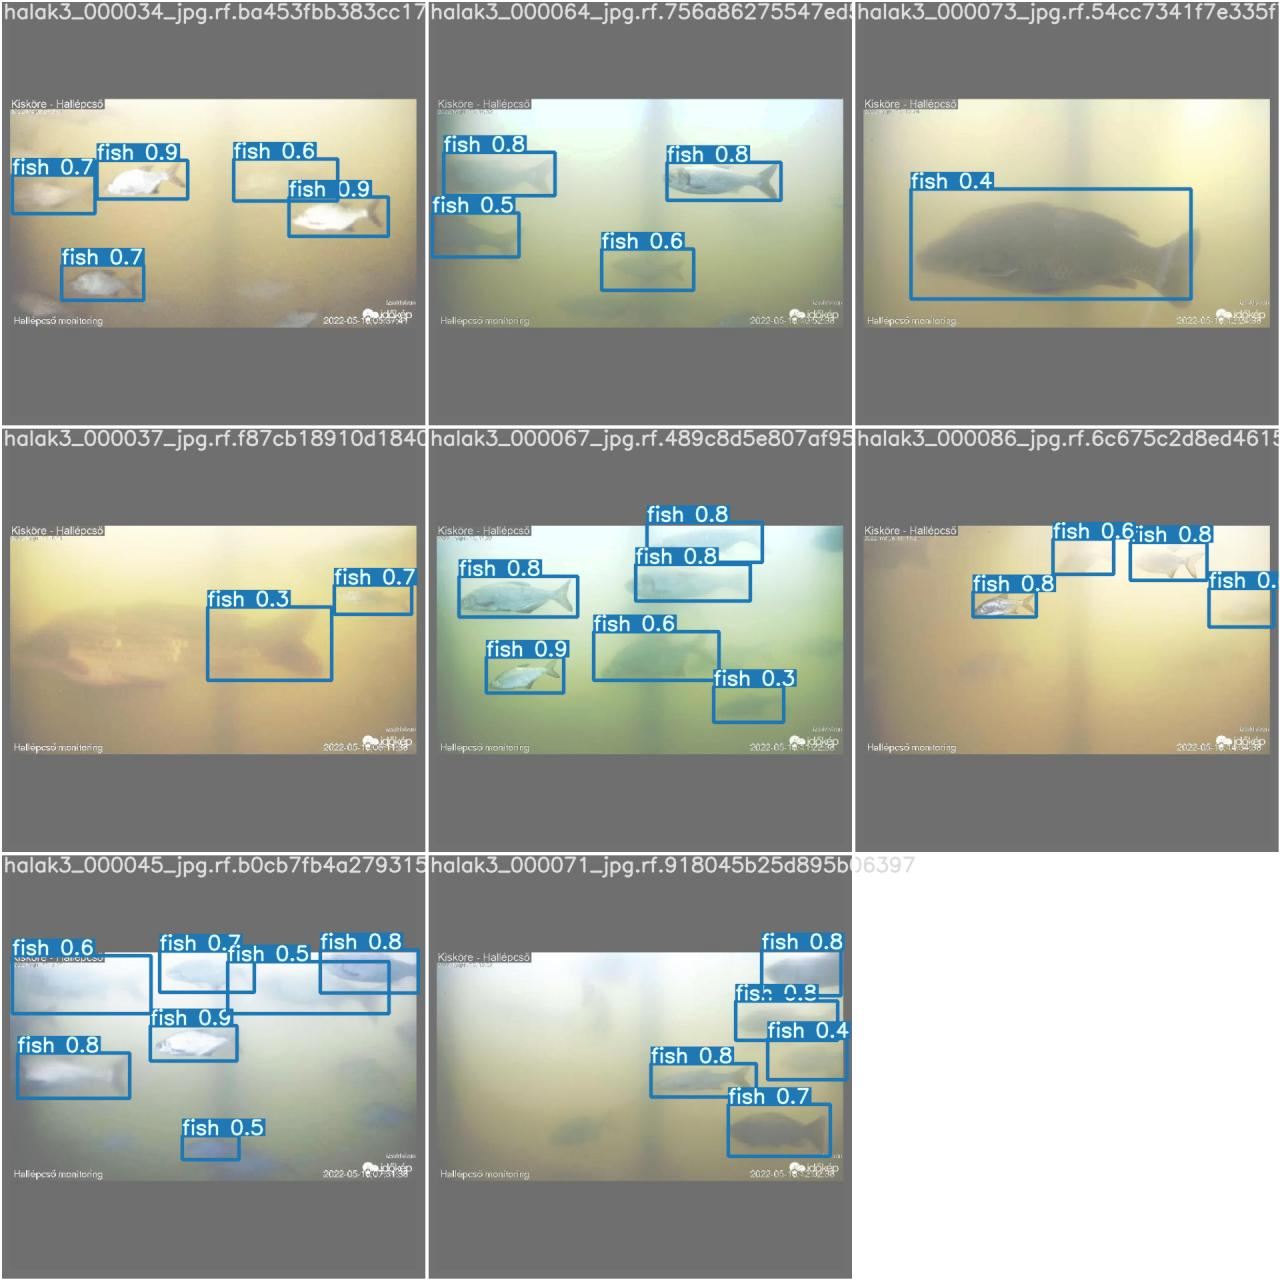

In [42]:
Image('runs/train/fish26/test_batch1_pred.jpg')

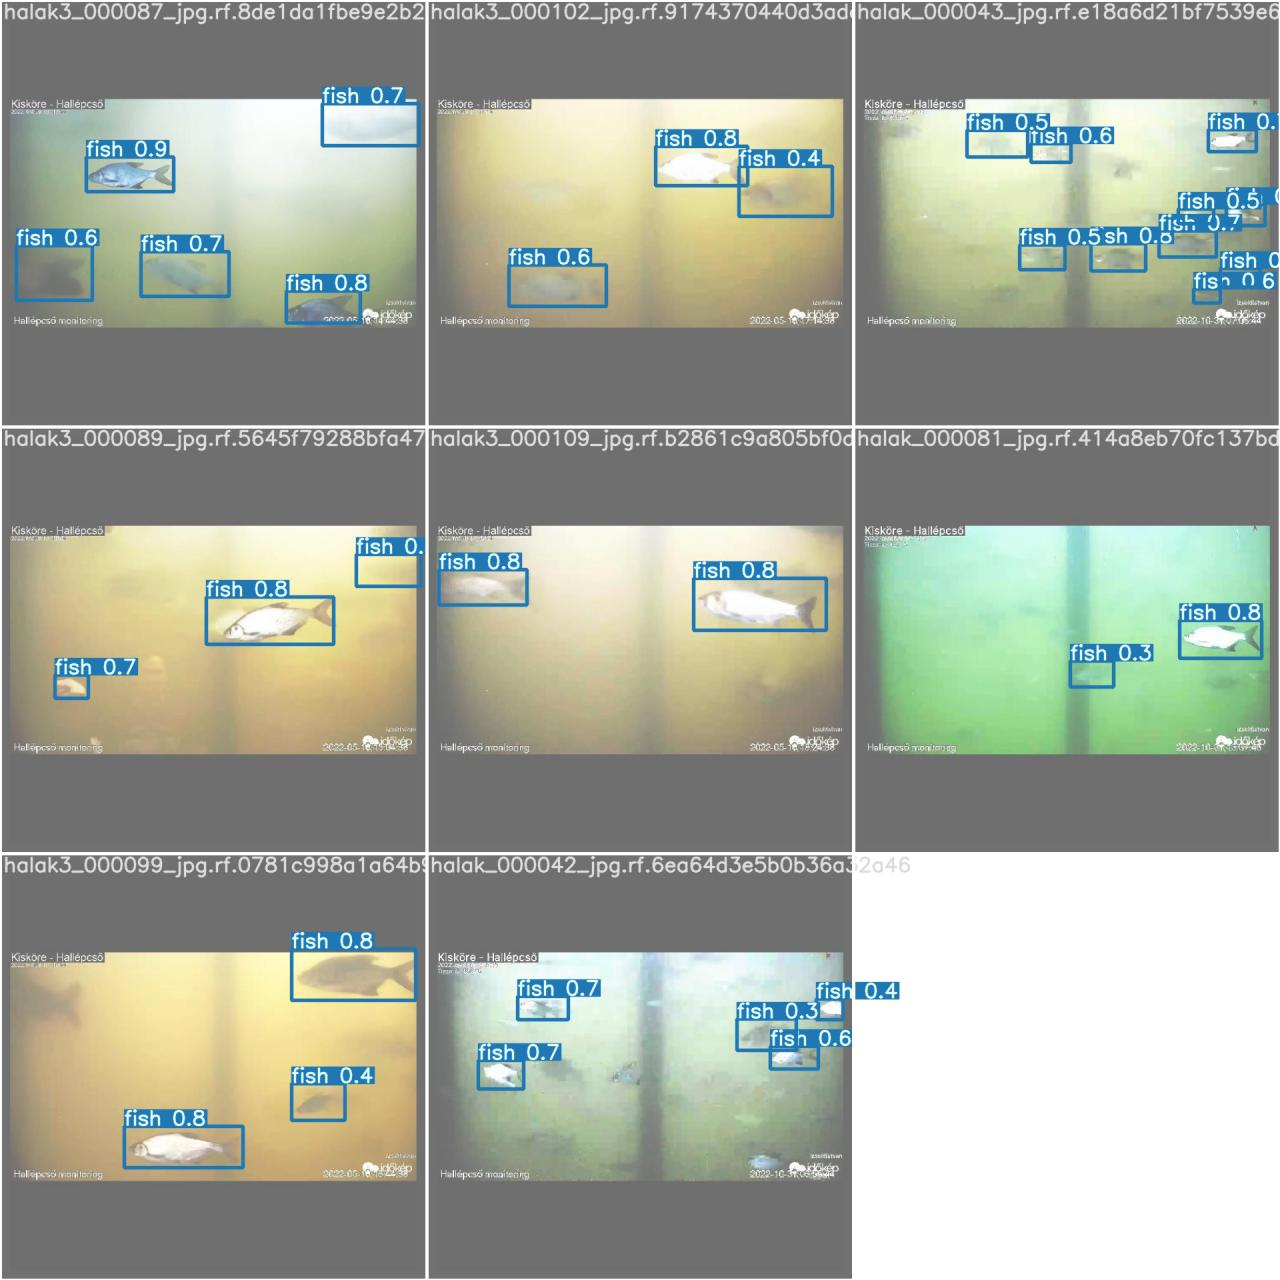

In [43]:
Image('runs/train/fish26/test_batch2_pred.jpg')

Overall, the result is satisfactory, but I think it can be improved. Possible improvements could be, for example, increasing the batch size, increasing the epochs. These two things have not been possible so far due to lack of time and resources. Another improvement could be to further fine tune the hyperparameters. The biggest result could be achived by increasing the size of the dataset.